# Mock analysis of the output parameters
In this notebook, we look at the mock results from the run with AGN (SKIRTOR and Fritz) to see how much of the results depends in the grid of parameters. First, we import the Python packages.

In [1]:
%pylab

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
import astropy.units as u
from astropy.table import Table, join, vstack

We read the clean results from the SKIRTOR and Fritz setups

In [3]:
ModelS = Table.read('../Data/Final/CIGALEOutputs/Cleanresults_SK.fits', format='fits')
ModelF = Table.read('../Data/Final/CIGALEOutputs/Cleanresults_Fr.fits', format='fits')

Then, we stack the results from the mock observations (NOT DONE YET)

In [4]:
INTERIM_FOLDER = '../Data/Interim/CIGALEOutputs_mock/'

# Fritz model
Mocks_Fr = Table()
for grp in range(1, 3): # It should be 11 at the end
    model = Table.read(INTERIM_FOLDER+'FrAGN_'+str(grp)+'/results_mock.fits',
                       format='fits')
    Mocks_Fr = vstack([model, Mocks_Fr])

# mock = Table.read(INTERIM_FOLDER+'FrAGN_1/results_mock.fits',
#                   format='fits')

# # SKIRTOR model
# Mocks_SK = Table()
# for grp in range(1, 11):
#     model = Table.read(INTERIM_FOLDER+'SKAGN_'+str(grp)+'/results_mock.fits',
#                        format='fits')
#     Mocks_SK = vstack([model, Mocks_SK])

We rename the Fritz models as $i=90-\psi$ (with $\psi$ the angle between the equator to the pole of the system) and the thermal (dust) luminosity to compare with SKIRTOR model.

In [5]:
Mocks_Fr.rename_column('bayes.agn.psy', 'bayes.agn.i')
Mocks_Fr.rename_column('bayes.agn.psy_err', 'bayes.agn.i_err')
Mocks_Fr.rename_column('bayes.agn.therm_luminosity', 'bayes.agn.dust_luminosity')
Mocks_Fr.rename_column('bayes.agn.therm_luminosity_err',
                   'bayes.agn.dust_luminosity_err')
Mocks_Fr['bayes.agn.i'] = 90-Mocks_Fr['bayes.agn.i']

Finally, we join both models with their mocks counterparts

In [6]:
# Both_SK = join(ModelSK, Mocks_SK, keys='id')
Both_Fr = join(ModelF, Mocks_Fr, keys='id')

We transform luminosities from W to solar luminosities. In addition, we reformat some parameters in log units, useful for the plots. 

In [7]:
for kisd in ['bayes.agn.luminosity', 'bayes.agn.disk_luminosity', 'bayes.agn.accretion_power',
             'bayes.agn.dust_luminosity', 'bayes.dust.luminosity']:
    for sub in ['_1', '_2']:
        Both_Fr[kisd+sub] = (Both_Fr[kisd+sub]).to(u.solLum)
        Both_Fr[kisd+'_err'+sub] = (Both_Fr[kisd+'_err'+sub]).to(u.solLum)

for asdf in ['bayes.agn.disk_luminosity', 'bayes.agn.accretion_power',
             'bayes.agn.luminosity', 'bayes.agn.dust_luminosity', 
             'bayes.dust.luminosity', 'bayes.sfh.sfr',
             'bayes.stellar.m_star', 'bayes.sfh.tau_main']:
    for sub in ['_1', '_2']:
        Both_Fr[asdf+'_err'+sub] = Both_Fr[asdf+'_err'+sub]/(Both_Fr[asdf+sub] * np.log(10))
        Both_Fr[asdf+sub] = np.log10(Both_Fr[asdf+sub])

## Check of $\chi_{\rm{red}}^{2}$ distributions
We check how the $\chi_{\rm{red}}^{2}$ have changed between the mock and the estimated values

Text(0, 0.5, '$\\log(\\chi^2_{\\rm{red}})$ Mock')

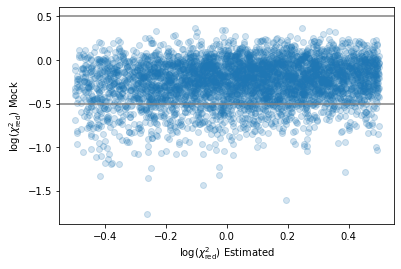

In [8]:
%matplotlib inline
paramet = 'best.reduced_chi_square'
plt.scatter(np.log10(Both_Fr[paramet+'_1']),
            np.log10(Both_Fr[paramet+'_2']), alpha=0.2)
plt.axhline(y=0.5, c='gray')
plt.axhline(y=-0.5, c='gray')
plt.xlabel(r'$\log(\chi^2_{\rm{red}})$ Estimated')
plt.ylabel(r'$\log(\chi^2_{\rm{red}})$ Mock')

## Plots between estimated and mock values
We present the plots between the estimated and mock values for a set of physical parameters important for this work. We define list to define the limits and labels for the different subplots.

In [9]:
list_part = ['agn.i', 'agn.fracAGN', 'agn.disk_luminosity', 'agn.EBV',
             'attenuation.E_BVs', 'sfh.tau_main', 'sfh.sfr',
             'agn.accretion_power', 'stellar.m_star', 'dust.luminosity']
#              'sfh.age', 'agn.luminosity', 'agn.dust_luminosity' ]
ParamLabel = ['View. Angle', r'$f_{\rm{AGN}}$', r'$\rm{L}_{\rm{AGN}}^{\rm{disc}}$',
              r'Polar-dust E(B-V)', 'E(B-V)', r'$\tau_{\rm{main}}$', 'SFR',
              'AGN accre. power',  r'Stellar Mass',  
              r'$\rm{L}_{\rm{dust}}$', '']
ParamRange = [[0, 90], [0.05, 0.95], [7, 12], [0, 1],
              [0, 0.4], [1.6, 3.7], [-3, 3],
              [8,13],[8,12], [8,12]]
ParamUnit = ['[degrees]', '[Fraction]', r'[$\log$(L$_{\odot}$)]', '[mag]',
             '[mag]', r'[$\log$(Myr)]', r'[$\log$(M$_{\odot}$/yr)]',
             r'[$\log$(L$_{\odot}$)]', r'[$\log$(M$_{\odot}$)]', r'[$\log$(L$_{\odot}$)]']
Particks = [[0, 25, 45, 65, 90], [0.25, 0.5, 0.75], [8, 10, 12], [0, 0.4, 0.8],
            [0, 0.2, 0.4], [2, 2.5, 3, 3.5], [-2, 0, 2],
            [8,10,12],[8,10,12],[8,10,12]]
LocErr = [[65, 25], [0.8, 0.2], [11, 8],
          [0.70, 0.35], [0.3, 0.1], [3.3, 2.0],
          [2, -2], [12, 9], [11.2,8.8], [11,9]]

In [10]:
%matplotlib 

# with plt.style.context('seaborn-talk'):
with plt.style.context('seaborn-paper'):
    plt.rcParams.update({'font.size': 11})
    plt.rcParams.update({'axes.labelsize': 11})
    plt.rcParams.update({'legend.fontsize': 10})
    plt.rcParams.update({'ytick.labelsize': 10})
    plt.rcParams.update({'xtick.labelsize': 10})
    fig, axs = subplots(3, 3, figsize=(14.06, 9))
    for i_par, phyp in enumerate(list_part[:-1]):
        ax = axs.ravel()[i_par]
        paramet = 'bayes.'+phyp
        bins_total = np.linspace(ParamRange[i_par][0], ParamRange[i_par][1], 26)
        hist_par, _, _ = np.histogram2d(Both_Fr[paramet+'_1'],
                                        Both_Fr[paramet+'_2'],
                                        bins=(bins_total, bins_total))
        hist_par[hist_par <= 1.0] = np.nan
        valper = hist_par.T/len(Both_Fr) * 100
        ax.scatter(Both_Fr[paramet+'_1'], Both_Fr[paramet+'_2'], c='Orange', s=1)
        mape = ax.imshow(valper, interpolation='None', origin='lower', cmap='YlOrBr',
                         extent=[bins_total.min(), bins_total.max(),
                                 bins_total.min(), bins_total.max()], zorder=1)
                         #                vmax=1)
    #                      vmax=np.nanpercentile(valper, 98))
        clb= fig.colorbar(mape, ax=ax, pad=0, fraction=0.0476)
        clb.ax.set_title('%')
        ax.plot([bins_total.min(), bins_total.max()],
                 [bins_total.min(), bins_total.max()], c='k', ls=':')
        ax.set_xlim(bins_total.min(), bins_total.max())
        ax.set_ylim(bins_total.min(), bins_total.max())
        ax.set_xticks(Particks[i_par])
        ax.set_yticks(Particks[i_par])
        ax.set_title(ParamLabel[i_par])
        ax.set_ylabel('Mock value '+ParamUnit[i_par])
        ax.set_xlabel('Estimated value '+ParamUnit[i_par])
        Xerr = np.median(Both_Fr[paramet+'_err_1'])
        Yerr = np.median(Both_Fr[paramet+'_err_2'])
        print(ParamLabel[i_par],'Median error ',Yerr)
        ax.errorbar(LocErr[i_par][0], LocErr[i_par][1],
                    xerr=Xerr, yerr=Yerr, c='gray')
    plt.subplots_adjust(wspace=0.0, left=0.1, right=0.9, top=0.95, bottom=0.05, hspace=0.4)
#     plt.savefig('../Figures/A2.pdf', dpi=300, bbox_inches='tight')  # For Paper
#     plt.savefig('../Talk_Figures/A2.png', dpi=300, bbox_inches='tight') ## For Presentation

Using matplotlib backend: Qt5Agg
View. Angle Median error  17.72357140245065
$f_{\rm{AGN}}$ Median error  0.11544198451813545
$\rm{L}_{\rm{AGN}}^{\rm{disc}}$ Median error  0.19604959992455204
Polar-dust E(B-V) Median error  0.288084812567849
E(B-V) Median error  0.047081782341461396
$\tau_{\rm{main}}$ Median error  0.2980873704735301
SFR Median error  0.1816237804007916
AGN accre. power Median error  0.1338637681406376
Stellar Mass Median error  0.11667906389400276


/Users/users/ramos/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:748: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [11]:
%load_ext watermark
%watermark -a "Andres Ramos" -d -v -m
print('Specific Python packages')
%watermark -iv -w --packages astroquery

Author: Andres Ramos

Python implementation: CPython
Python version       : 3.8.3
IPython version      : 7.16.1

Compiler    : GCC 7.3.0
OS          : Linux
Release     : 3.10.0-1160.25.1.el7.x86_64
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

Specific Python packages
astroquery: 0.4.1

autopep8  : 1.5.7
numpy     : 1.19.5
astropy   : 4.2
sys       : 3.8.3 (default, Jul  2 2020, 16:21:59) 
[GCC 7.3.0]
re        : 2.2.1
json      : 2.0.9
logging   : 0.5.1.2
matplotlib: 3.2.2

Watermark: 2.1.0

